In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [13]:
df = pd.read_csv("FuelConsumption.csv")

In [14]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

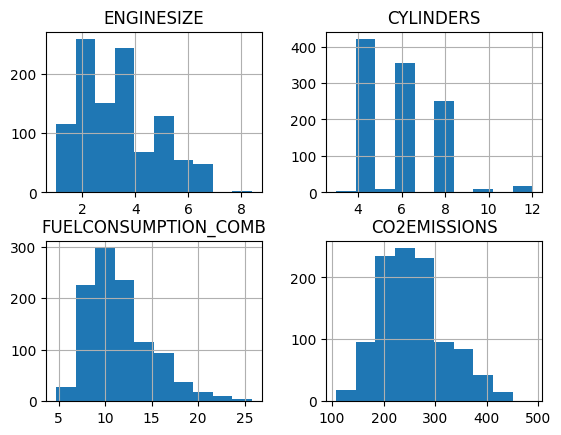

In [15]:
df = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
df.hist()

[]

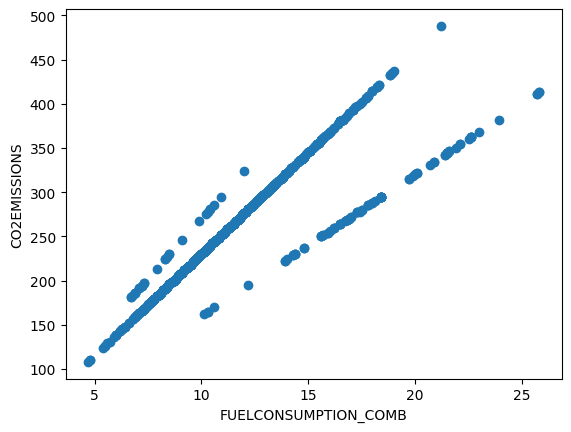

In [16]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS)
plt.ylabel("CO2EMISSIONS")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.plot()

[]

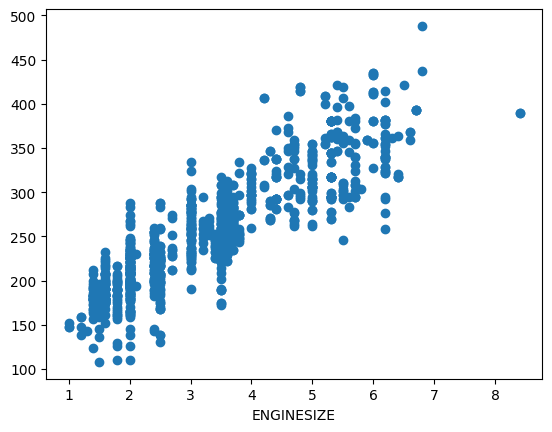

In [17]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.xlabel("CO2EMISSIONS")
plt.xlabel("ENGINESIZE")
plt.plot()

In [18]:
x = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]].values
y = df["CO2EMISSIONS"].values
print(x.shape)
print(y.shape)

(1067, 3)
(1067,)


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)
print(x_test.shape, y_test.shape)
print(x_train.shape, y_train.shape)

(214, 3) (214,)
(853, 3) (853,)


In [29]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print(regr.coef_, regr.intercept_)

[10.24537129  7.64355532  9.68132732] 65.25787570246109


In [37]:
from sklearn.metrics import r2_score
yhat = regr.predict(x_test)
r2_score(y_test, yhat)

0.890023090970219

Text(0.5, 0.92, 'Multiple Linear Regression co2 emissions')

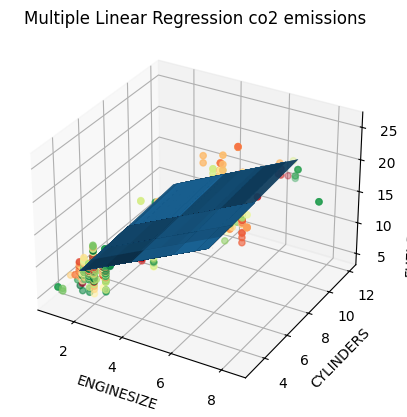

In [49]:
from mpl_toolkits.mplot3d import Axes3D


# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the independent variables
x = df['ENGINESIZE']
y = df['CYLINDERS']
z = df['FUELCONSUMPTION_COMB']
cm = plt.get_cmap("RdYlGn")
col = [cm(float(i)/(len(x))) for i in range(len(x))]

# Add the data points
ax.scatter(x, y, z, c=col, marker='o')

# Fit a plane using np.linalg.lstsq
A = np.vstack([x, y, np.ones_like(x)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

# Create a meshgrid for the plane
x_plane, y_plane = np.meshgrid(x, y)
z_plane = plane_coef[0] * x_plane + plane_coef[1] * y_plane + plane_coef[2]

# Add the regression plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5)

# Add labels and title
ax.set_xlabel('ENGINESIZE')
ax.set_ylabel('CYLINDERS')
ax.set_zlabel('FUELCONSUMPTION_COMB')
plt.title('Multiple Linear Regression co2 emissions')
